## Installing dependencies. Useful for running on Google Colab

In [ ]:
# pyarrow might be needed to read the data
!python -m pip install Cython
!python -m pip install -e git+https://git@github.com/alercebroker/turbo-fats#egg=turbofats
!python -m pip install -e git+https://git@github.com/alercebroker/mhps#egg=mhps
!python -m pip install -e git+https://git@github.com/alercebroker/P4J#egg=P4J
!python -m pip install pyarrow
!python -m pip install -e git+https://git@github.com/alercebroker/lc_classifier#egg=lc_classifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining turbofats from git+https://****@github.com/alercebroker/turbo-fats#egg=turbofats
  Updating ./src/turbofats clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 0e8f0452ce1bcac69ee876c5598a0e1152374400
  Attempting uninstall: turbofats
    Found existing installation: turbofats 2.0.0
    Can't uninstall 'turbofats'. No files were found to uninstall.
  Running setup.py develop for turbofats
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining mhps from git+https://****@github.com/alercebroker/mhps#egg=mhps
  Updating ./src/mhps clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 7ace7dbaccd7026d69190265d91501fae5d2b1ca
  Attempting uninstall: mhps
    Found existing ins

## [Google Colab] Please restart Python after installing the packages:
### Runtime >> Restart runtime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lc_classifier.utils import LightcurveBuilder

# Build a synthetic lightcurve

LightcurveBuilder is an auxiliary object that helps you building a Pandas dataframe that is compatible with our library. With LightcurveBuilder you can add as many bands (filters) as you have.

In the following example we will build a synthetic sinusoidal lightcurve that was observed in three bands: u, g and r.

In [ ]:
bands = ['u', 'g', 'r']
true_period = 0.37
lightcurve_builder = LightcurveBuilder('lc_001')
for band in bands:
    n_obs_band = np.random.randint(15, 30)
    time = np.random.rand(n_obs_band) * 700
    magnitude = 17.0 + 0.3 * np.sin(time*2*np.pi/true_period)
    error = np.random.randn(n_obs_band) ** 2 * 0.3 + 0.05
    error = np.clip(error, 0.0, 0.4)
    magnitude += np.random.randn(n_obs_band) * error

    lightcurve_builder.add_band(
        band,
        time,
        magnitude,
        error)

lightcurve = lightcurve_builder.build_dataframe()
lightcurve

,time,magnitude,error,band
oid,,,,
lc_001,480.437234,17.089614,0.400000,u
lc_001,238.135077,16.809177,0.376394,u
lc_001,598.145548,16.725766,0.102214,u
lc_001,2.546496,16.682448,0.400000,u
lc_001,230.627493,17.246597,0.157603,u
lc_001,157.644446,16.910246,0.230112,u
lc_001,446.501312,16.729511,0.083044,u
lc_001,181.627871,18.142873,0.400000,u
lc_001,671.223202,17.230613,0.400000,u


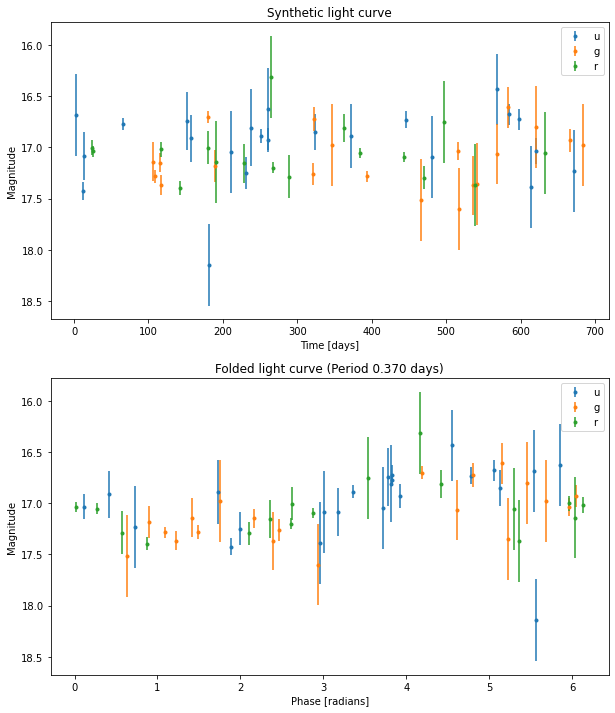

In [ ]:
fig = plt.figure(figsize=(10, 12))
fig.set_facecolor('white')

plt.subplot(2, 1, 1)
for band in bands:
    obs_in_band = lightcurve[lightcurve.band == band]
    plt.errorbar(
        obs_in_band.time,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('Synthetic light curve')
plt.legend()
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
for band in bands:
    obs_in_band = lightcurve[lightcurve.band == band]
    plt.errorbar(
        (obs_in_band.time % true_period) / true_period * 2 * np.pi,
        obs_in_band.magnitude,
        yerr=obs_in_band.error,
        fmt='.',
        label=band
    )

plt.xlabel('Phase [radians]')
plt.ylabel('Magnitude')
plt.title(f'Folded light curve (Period {true_period:.3f} days)')
plt.legend()
plt.gca().invert_yaxis()

plt.show()

# Compute features from lightcurve

Our library has many available feature extractors inside the features module. You can combine them using a FeatureExtractorComposer object.

In [ ]:
from lc_classifier.features import MHPSExtractor, PeriodExtractor, GPDRWExtractor
from lc_classifier.features import FoldedKimExtractor
from lc_classifier.features import HarmonicsExtractor, IQRExtractor
from lc_classifier.features import PowerRateExtractor
from lc_classifier.features import TurboFatsFeatureExtractor

from lc_classifier.features import FeatureExtractorComposer

In [ ]:
feature_extractor = FeatureExtractorComposer(
    [
        MHPSExtractor(bands),
        PeriodExtractor(bands),
        GPDRWExtractor(bands),
        FoldedKimExtractor(bands),
        HarmonicsExtractor(bands),
        IQRExtractor(bands),
        PowerRateExtractor(bands),
        TurboFatsFeatureExtractor(bands)
    ]
)

To compute the features we give the dataframe with observations to the compute_features method of our feature extractor. The features appear as columns and the different objects as rows.

In [ ]:
features = feature_extractor.compute_features(lightcurve)
features

,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,MHPS_PN_flag_u,MHPS_ratio_g,MHPS_low_g,MHPS_high_g,MHPS_non_zero_g,MHPS_PN_flag_g,...,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,SF_ML_amplitude_r,SF_ML_gamma_r,IAR_phi_r,LinearTrend_r
oid,,,,,,,,,,,,,,,,,,,,,
lc_001,10090.87793,2.047863,0.000203,1.0,1.0,103.454948,1.07547,0.010396,4.0,1.0,...,-1.337214,4.346363,0.251319,0.775531,0.999925,0.000022,0.081777,-0.5,0.215882,0.000058


Let's check if the computed period is similar to the true period that we used to build our synthetic light curve.

In [ ]:
period_feature_names = [f for f in features.columns if 'period' in f.lower()]
features[period_feature_names]

,Multiband_period,Period_band_u,delta_period_u,Period_band_g,delta_period_g,Period_band_r,delta_period_r
oid,,,,,,,
lc_001,0.37001,0.66269,0.292681,0.37001,0.0,0.348797,0.021213


## Let's calculate features for many lightcurves with different periods

In [ ]:
bands = ['u', 'g', 'r']

n_curves = 100
true_periods = np.logspace(-1, 2.5, n_curves)
lightcurves = []
for i in range(n_curves):
    true_period = true_periods[i]
    lightcurve_builder = LightcurveBuilder(f'lc_{i:04}')
    for band in bands:
        n_obs_band = np.random.randint(15, 30)
        time = np.random.rand(n_obs_band) * 700
        magnitude = 17.0 + 0.3 * np.sin(time*2*np.pi/true_period)
        error = np.random.randn(n_obs_band) ** 2 * 0.3 + 0.05
        error = np.clip(error, 0.0, 0.4)
        magnitude += np.random.randn(n_obs_band) * error

        lightcurve_builder.add_band(
            band,
            time,
            magnitude,
            error)

    lightcurve = lightcurve_builder.build_dataframe()
    lightcurves.append(lightcurve)
lightcurves = pd.concat(lightcurves)
lightcurves

,time,magnitude,error,band
oid,,,,
lc_0000,475.661102,16.756022,0.054944,u
lc_0000,40.493877,16.629695,0.400000,u
lc_0000,10.685306,16.638064,0.400000,u
lc_0000,397.480991,16.744997,0.230383,u
lc_0000,80.586850,16.948179,0.242427,u
...,...,...,...,...
lc_0099,244.094179,16.482879,0.400000,r
lc_0099,175.739174,17.481338,0.262504,r
lc_0099,20.473787,17.079398,0.058689,r


In [ ]:
features = feature_extractor.compute_features(lightcurves)
features

 /usr/local/lib/python3.7/dist-packages/celerite2/numpy.py:108: RuntimeWarning:divide by zero encountered in true_divide
 /usr/local/lib/python3.7/dist-packages/celerite2/core.py:427: RuntimeWarning:invalid value encountered in double_scalars
 /usr/local/lib/python3.7/dist-packages/celerite2/numpy.py:108: RuntimeWarning:overflow encountered in square
 /content/src/lc-classifier/lc_classifier/features/extractors/gp_drw_extractor.py:52: RuntimeWarning:overflow encountered in exp
 /content/src/turbofats/turbofats/FeatureSpace.py:57: RankWarning:Polyfit may be poorly conditioned
 /content/src/turbofats/turbofats/FeatureSpace.py:57: RankWarning:Polyfit may be poorly conditioned


,MHPS_ratio_u,MHPS_low_u,MHPS_high_u,MHPS_non_zero_u,MHPS_PN_flag_u,MHPS_ratio_g,MHPS_low_g,MHPS_high_g,MHPS_non_zero_g,MHPS_PN_flag_g,...,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,SF_ML_amplitude_r,SF_ML_gamma_r,IAR_phi_r,LinearTrend_r
oid,,,,,,,,,,,,,,,,,,,,,
lc_0000,16.967852,0.887864,0.052326,6.0,0.0,NaN,NaN,NaN,NaN,NaN,...,-0.451860,-0.633545,0.204350,0.666077,1.000000,-0.000104,-0.500000,-0.500000,4.230063e-13,0.000224
lc_0001,73.144691,1.787846,0.024443,4.0,1.0,308.000702,1.054908,0.003425,7.0,1.0,...,-0.849605,1.106375,0.328808,0.833007,0.996095,0.000005,0.060129,-0.442605,5.795921e-12,0.000189
lc_0002,244.595840,2.161362,0.008836,4.0,1.0,NaN,NaN,NaN,NaN,NaN,...,-0.618133,-0.221732,0.401186,0.775528,1.000000,0.000341,0.411145,-0.054455,8.536714e-01,-0.000039
lc_0003,6.565822,1.099617,0.167476,9.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.138886,-0.405814,0.298339,0.780708,1.000000,0.000076,0.189966,-0.163051,7.260681e-01,-0.000061
lc_0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.740424,1.231212,0.388212,0.827778,1.000000,0.000320,0.588524,0.148996,7.945412e-07,-0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lc_0095,34.805969,0.466090,0.013391,3.0,1.0,46.282162,0.869322,0.018783,9.0,1.0,...,-0.230483,-0.974365,0.262524,0.828343,1.000000,0.000073,0.546968,0.285263,9.856404e-01,-0.000294
lc_0096,107.962311,1.246535,0.011546,9.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.058498,-0.694885,0.291305,0.770682,1.000000,0.000032,0.179015,-0.192033,9.382456e-01,-0.000656
lc_0097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.366731,-0.551599,0.302525,0.728753,1.000000,0.000114,0.703525,0.512680,9.777661e-01,-0.000111


In [ ]:
computed_periods = features['Multiband_period']
computed_periods

oid
lc_0000      0.099999
lc_0001      0.108482
lc_0002      0.117681
lc_0003      0.127661
lc_0004      0.138488
              ...    
lc_0095    228.915657
lc_0096    240.506328
lc_0097    267.605628
lc_0098    296.874985
lc_0099    316.666658
Name: Multiband_period, Length: 100, dtype: float64

Text(0, 0.5, 'Computed period')

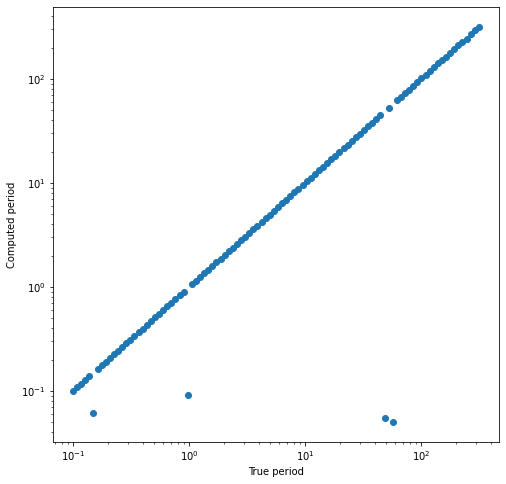

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

plt.scatter(true_periods, computed_periods)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.xlabel('True period')
plt.ylabel('Computed period')